In [5]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('TBS-ecotriplet\\2025_05_19.txt', delimiter='\t')

In [7]:
df

,date,time,Unnamed: 2,turb,Unnamed: 4,chl,Unnamed: 6,cDOM,Unnamed: 8,Unnamed: 9
0,05/12/25,12:48:06,700.0,4130.0,695.0,1409.0,460.0,4130.0,541.0,NaN
1,05/12/25,12:48:07,700.0,4130.0,695.0,1407.0,460.0,4130.0,541.0,NaN
2,05/12/25,12:48:08,700.0,4130.0,695.0,1390.0,460.0,4130.0,541.0,NaN
3,05/12/25,12:48:09,700.0,4130.0,695.0,1379.0,460.0,4130.0,540.0,NaN
4,05/12/25,12:48:10,700.0,4130.0,695.0,1369.0,460.0,4130.0,540.0,NaN
...,...,...,...,...,...,...,...,...,...,...
5981,05/19/25,10:48:11,700.0,830.0,695.0,163.0,460.0,66.0,557.0,NaN
5982,05/19/25,11:06:58,700.0,4130.0,695.0,1412.0,460.0,4130.0,554.0,NaN
5983,05/19/25,11:06:59,700.0,4130.0,695.0,1413.0,460.0,4130.0,553.0,NaN
5984,05/19/25,11:07:00,700.0,4130.0,695.0,1421.0,460.0,4130.0,553.0,NaN


In [8]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [9]:

#df['cDOM'] = pd.to_numeric(df['cDOM'], errors='coerce')


In [10]:
print(df.dtypes)

date           object
time           object
Unnamed: 2    float64
turb          float64
Unnamed: 4    float64
chl           float64
Unnamed: 6    float64
cDOM          float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object


In [11]:
#calculate the parameters according to the manual
chl = 0.0122*(df['chl']-51)
turb = (2.966e-06)*(df['turb']-50)
cDOM = 0.0905*(df['cDOM'].astype(float)-47)
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

C:\Users\pauliins\AppData\Local\Temp\ipykernel_15504\1465471502.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [12]:
datetime = df['datetime'] 

(0.0, 10.0)

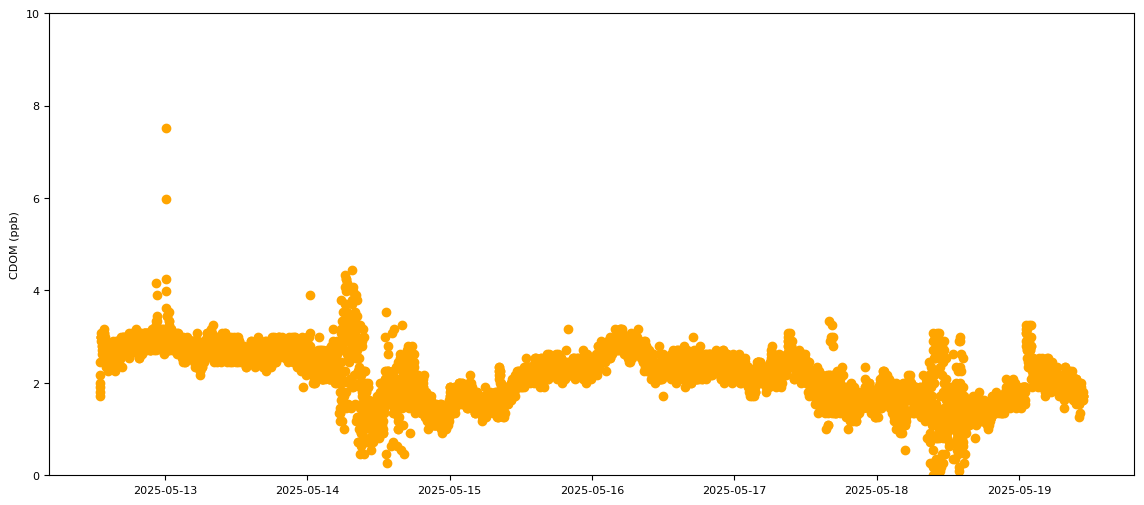

In [15]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=8)
plt.scatter(datetime[:], cDOM[:], color='orange')
plt.ylabel('CDOM (ppb)')
plt.ylim(0, 10)

Text(0, 0.5, 'b (m-1 sr-1)')

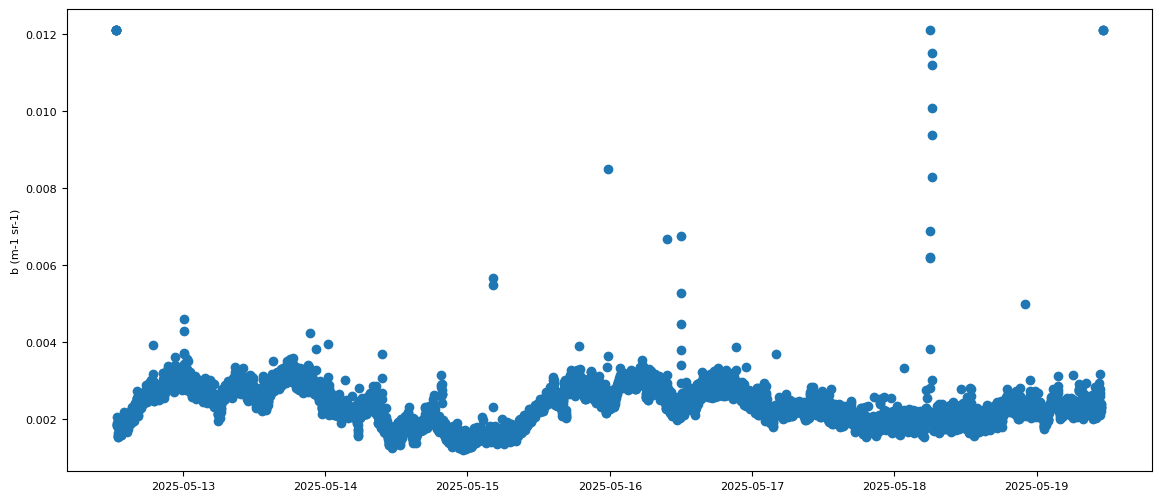

In [16]:
plt.figure(figsize=(14, 6))
plt.scatter(datetime[:], turb[:])
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.ylabel('b (m-1 sr-1)')
#plt.ylim(0,0.015)

(0.0, 10.0)

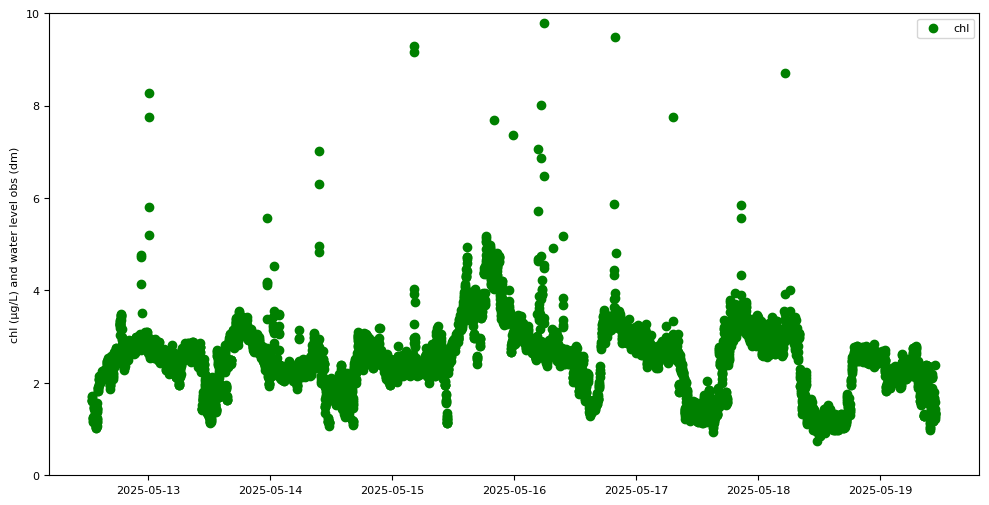

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(datetime[:], chl[:], color = 'green', label='chl')
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.legend(loc='best')
plt.ylim(0,10)

In [18]:
calibrated_data = pd.DataFrame({'datetime':datetime, 'chl':chl, 'turb': turb, 'cDOM':cDOM})

In [19]:
print(calibrated_data)

                datetime      chl      turb      cDOM
0    2025-05-12 12:48:06  16.5676  0.012101  369.5115
1    2025-05-12 12:48:07  16.5432  0.012101  369.5115
2    2025-05-12 12:48:08  16.3358  0.012101  369.5115
3    2025-05-12 12:48:09  16.2016  0.012101  369.5115
4    2025-05-12 12:48:10  16.0796  0.012101  369.5115
...                  ...      ...       ...       ...
5981 2025-05-19 10:48:11   1.3664  0.002313    1.7195
5982 2025-05-19 11:06:58  16.6042  0.012101  369.5115
5983 2025-05-19 11:06:59  16.6164  0.012101  369.5115
5984 2025-05-19 11:07:00  16.7140  0.012101  369.5115
5985                 NaT      NaN       NaN       NaN

[5986 rows x 4 columns]


In [20]:
calibrated_data.to_csv('TBS-ecotriplet\\calibrated_data_2025_05_19.txt', sep='\t')